In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
data = np.load("outputs.npy")


In [5]:
data.shape

(900, 1, 1, 32)

<ipython-input-26-d89d6cbf3049>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,3))
<ipython-input-26-d89d6cbf3049>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,3))
<ipython-input-26-d89d6cbf3049>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,3))
<

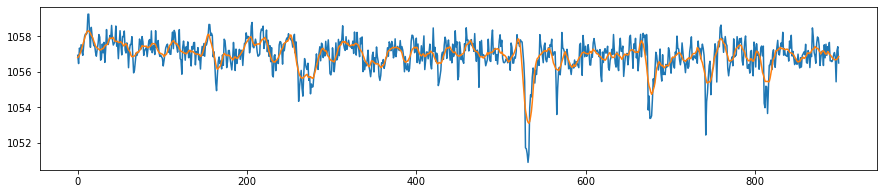

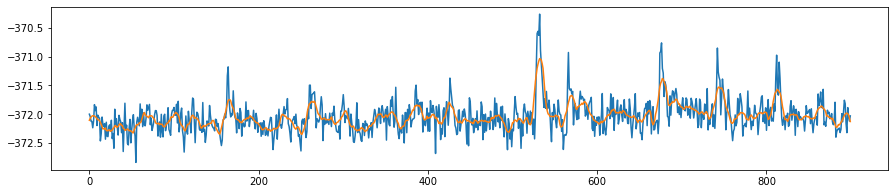

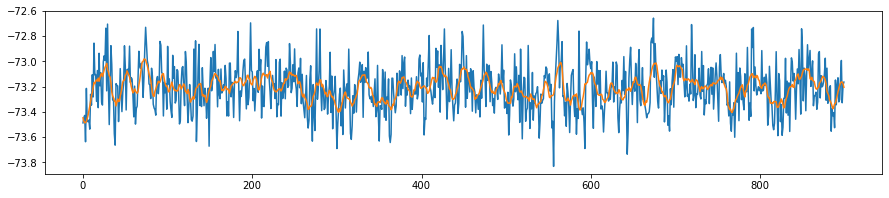

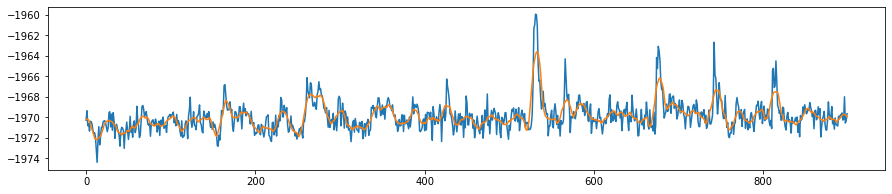

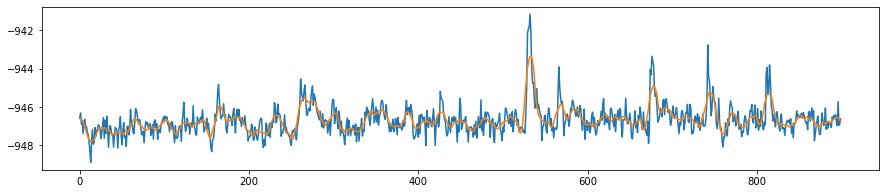

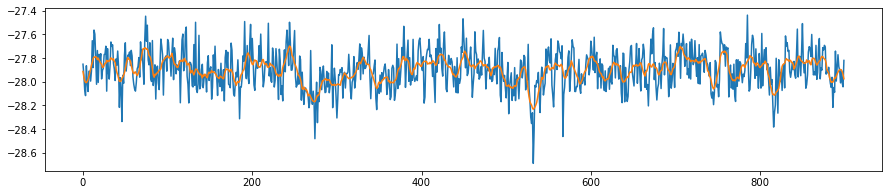

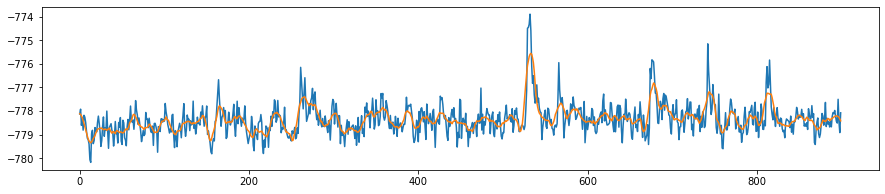

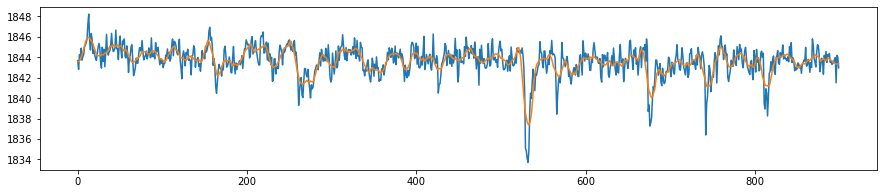

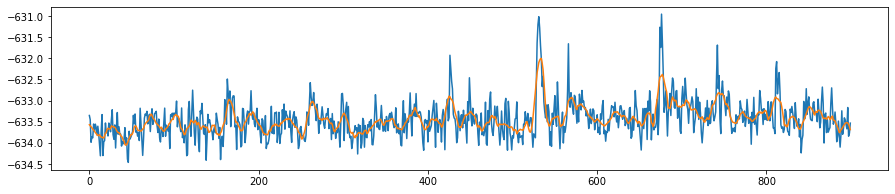

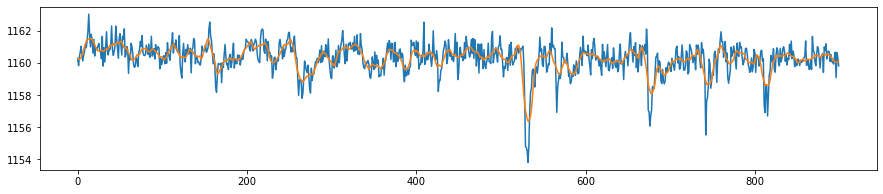

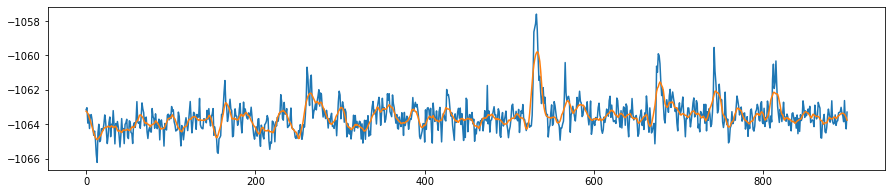

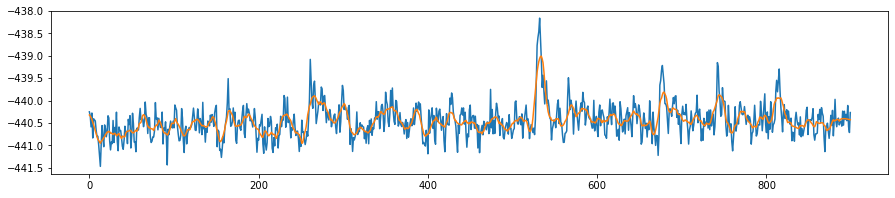

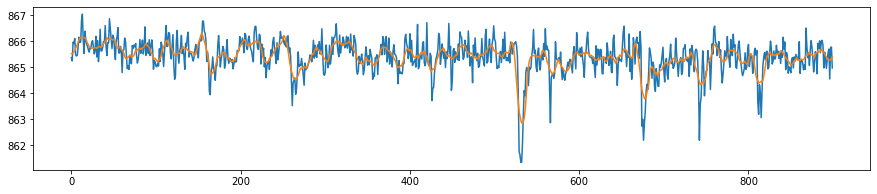

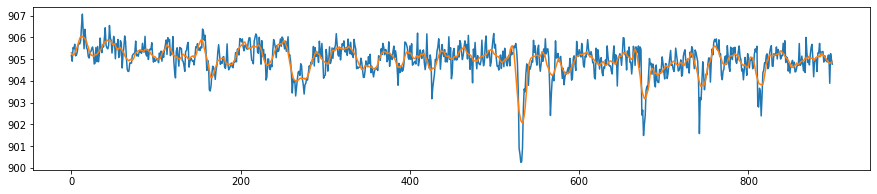

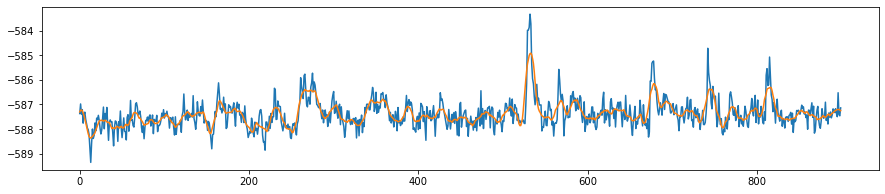

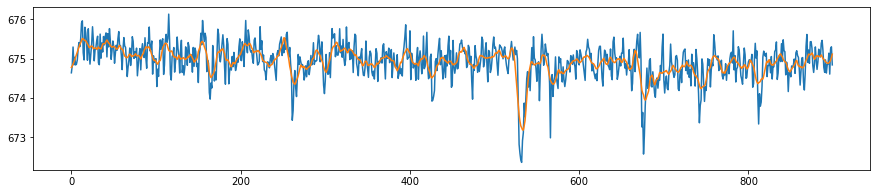

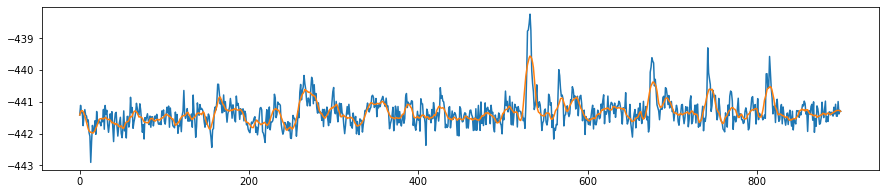

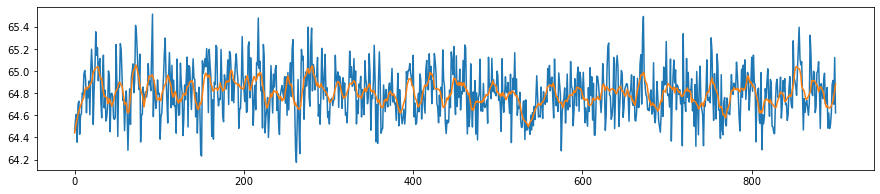

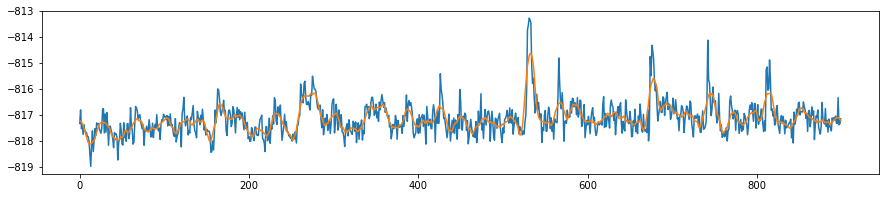

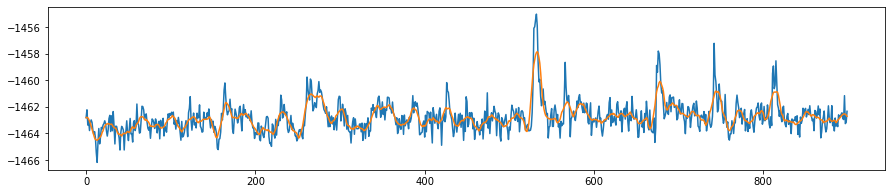

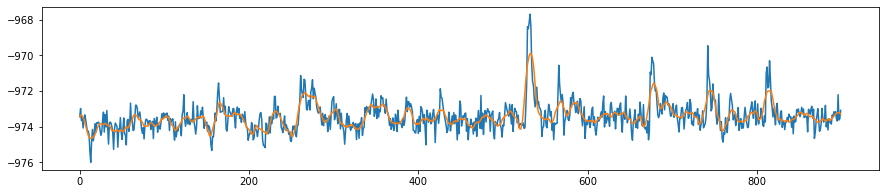

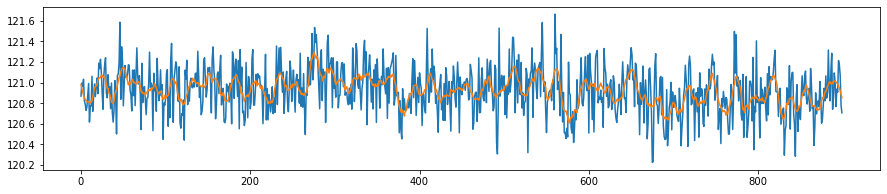

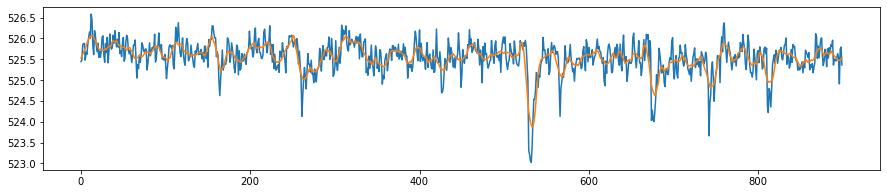

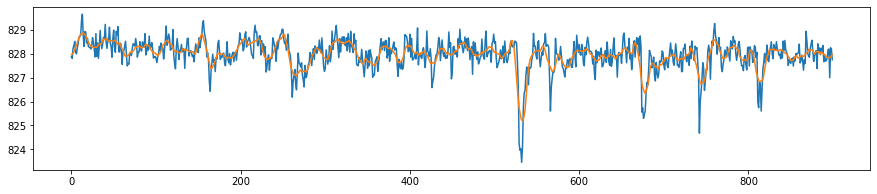

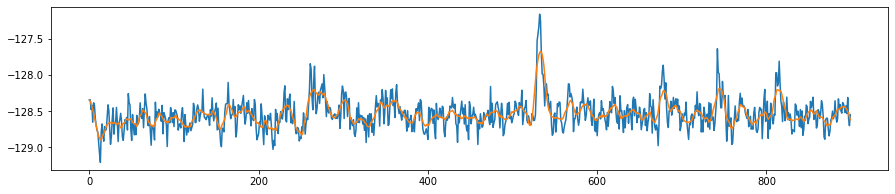

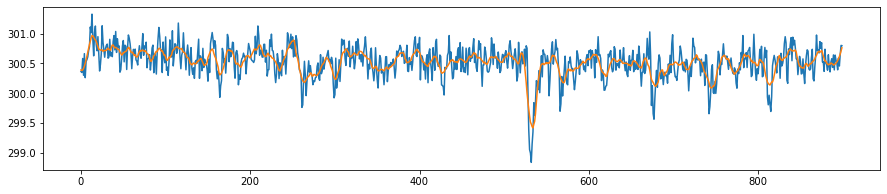

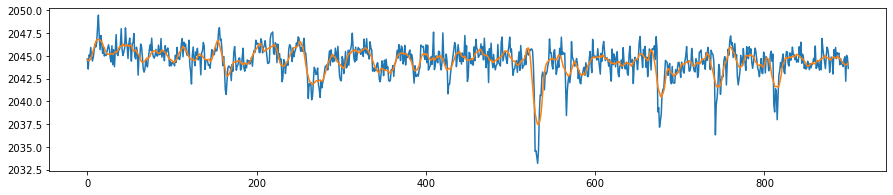

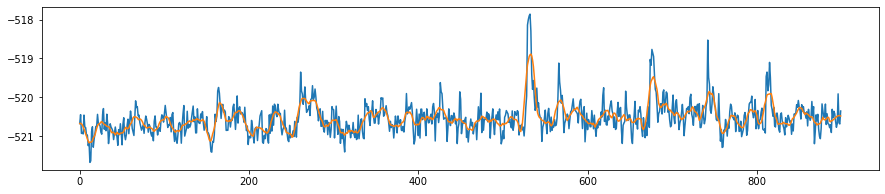

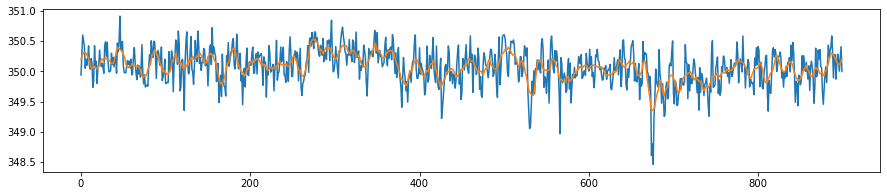

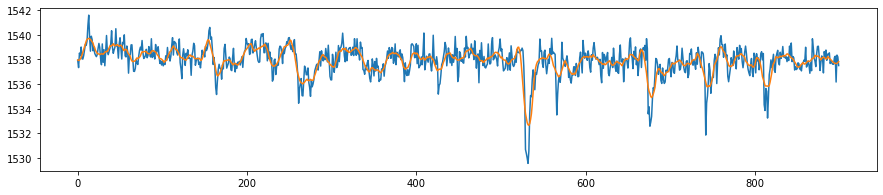

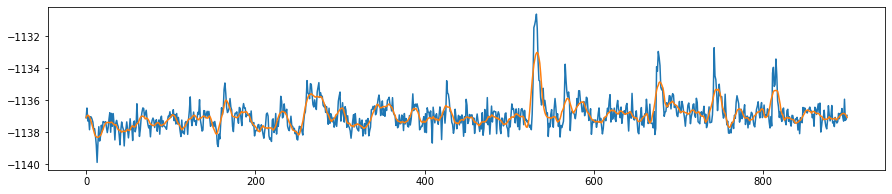

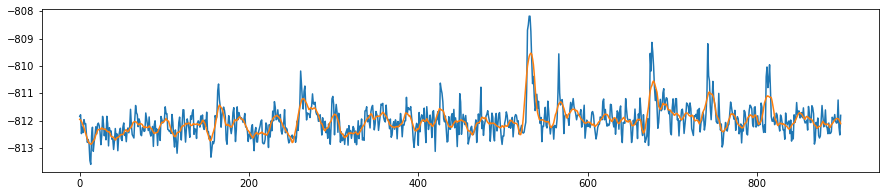

In [26]:
for i in range(data.shape[-1]):
    from scipy.signal import savgol_filter
    non_smoothed = data[:,0,0,i]
    smoothed = savgol_filter(data[:,0,0,i], 21, 3)
    plt.figure(figsize=(15,3))
    plt.plot(non_smoothed)
    plt.plot(smoothed)
    
    

In [85]:
data = data.reshape((data.shape[0], 32))

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean()) // 1
result = np.zeros((32,32))

for i in range(32):
    for j in range(32):
        result[i,j] = rmse(data[:,i], data[:,j])


In [88]:
fig, ax = plt.subplots(figsize=(100,100))
im = ax.imshow(result)
ax.set_xticks(np.arange(32))
ax.set_yticks(np.arange(32))
ax.set_xticklabels(range(32), fontsize=50)
ax.set_yticklabels(range(32), fontsize=50)
for i in range(32):
    for j in range(32):
        text = ax.text(j, i, result[i, j],
                       ha="center", va="center", color="w", fontsize=50)
fig.tight_layout()

plt.show()